# Credits

1. [https://colah.github.io/posts/2015-08-Understanding-LSTMs/](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
2. MIT 6S191 Lecture 2 Slides

# Time Series / Sequence Data
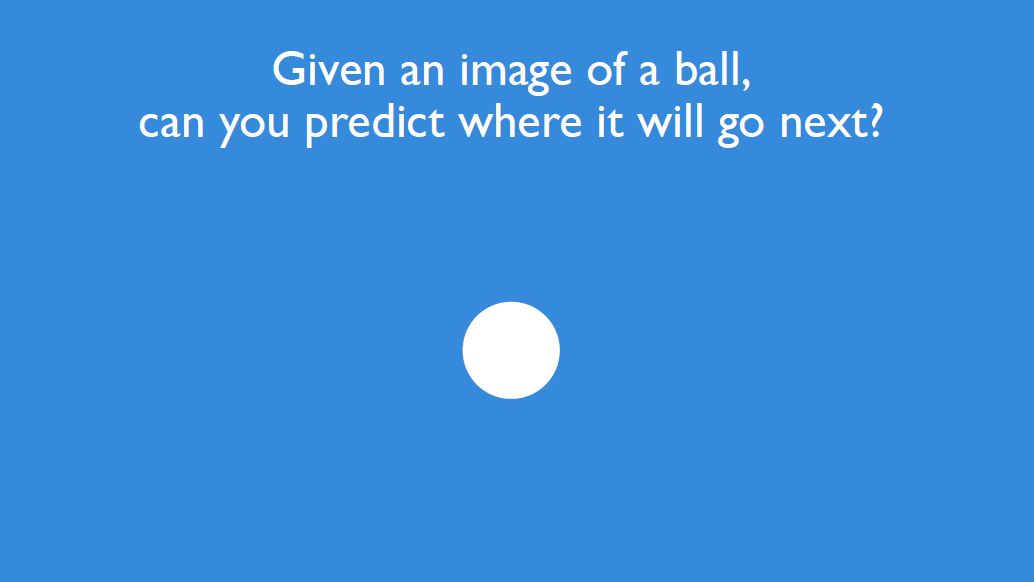

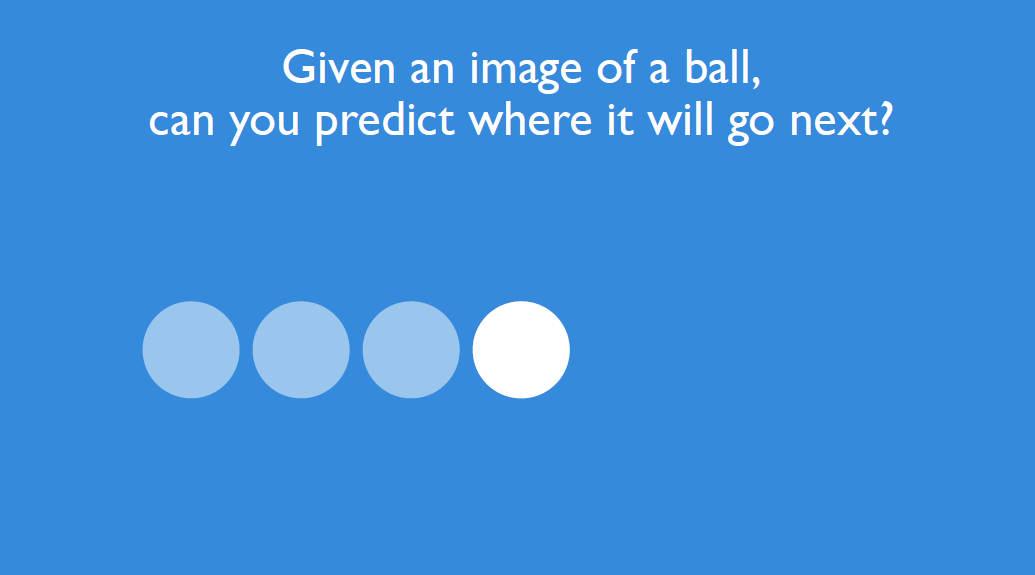

# Examples

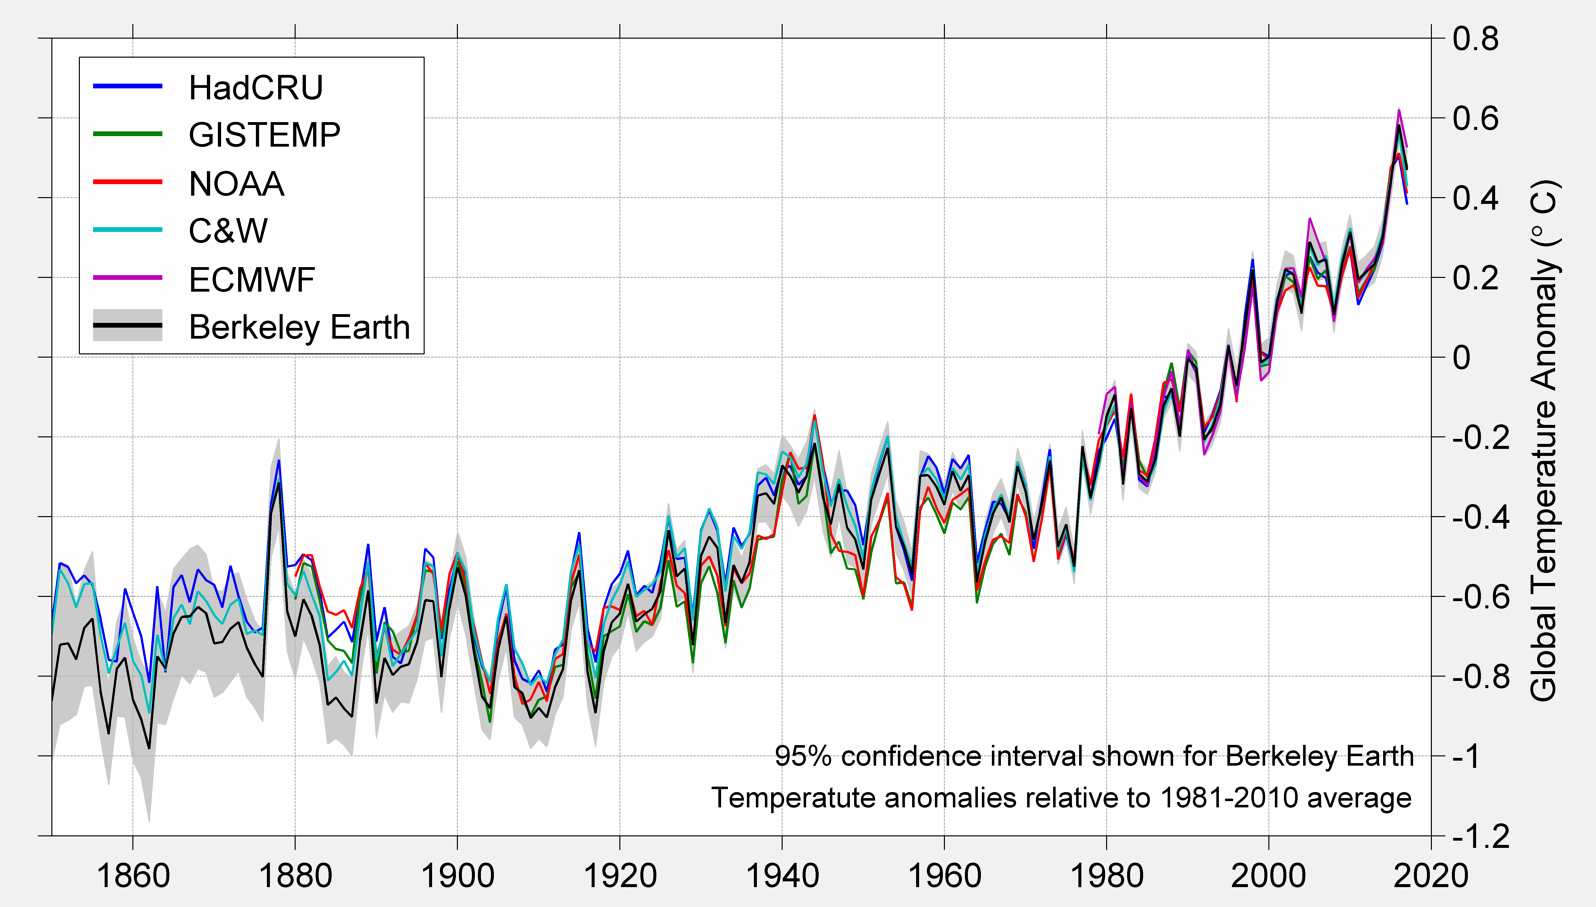

## Language Modelling
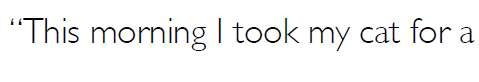

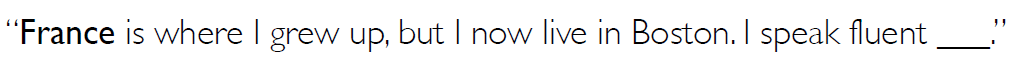

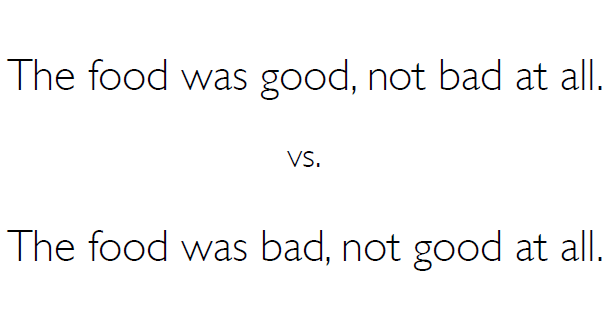

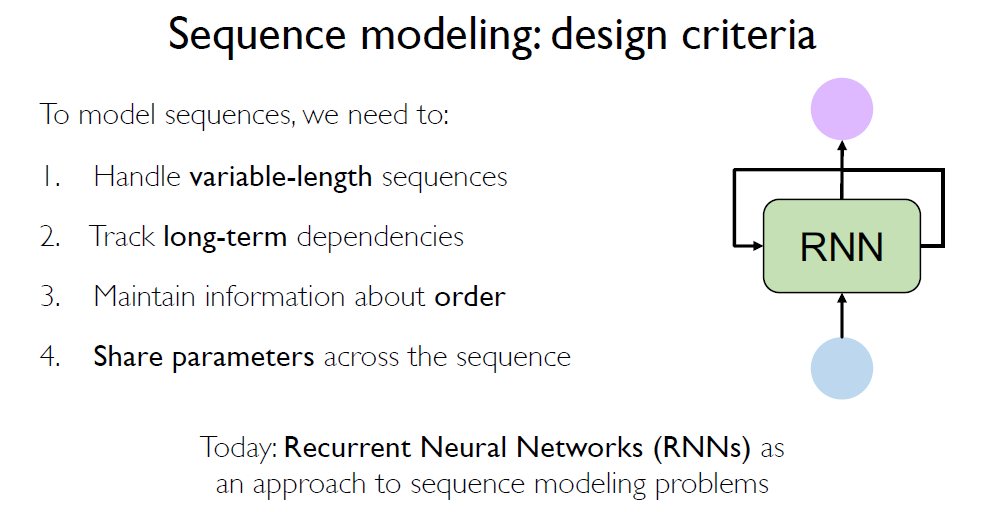

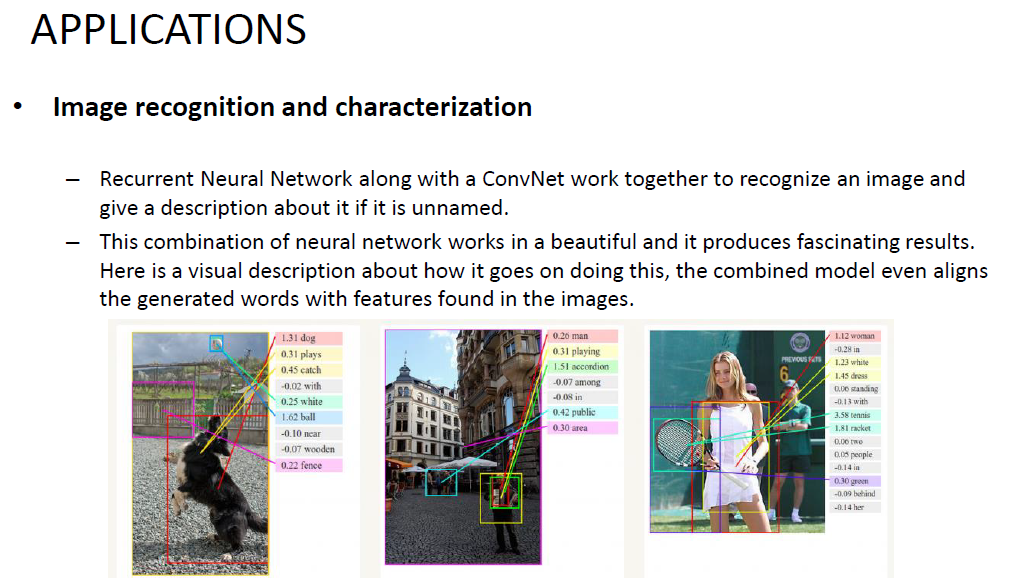

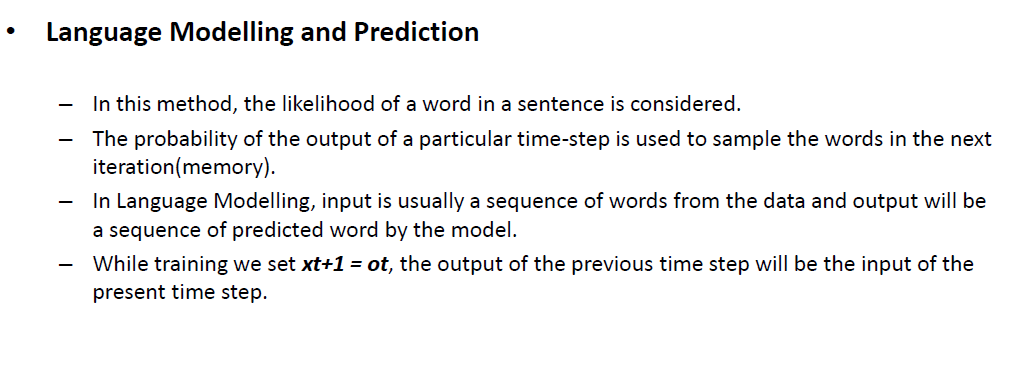

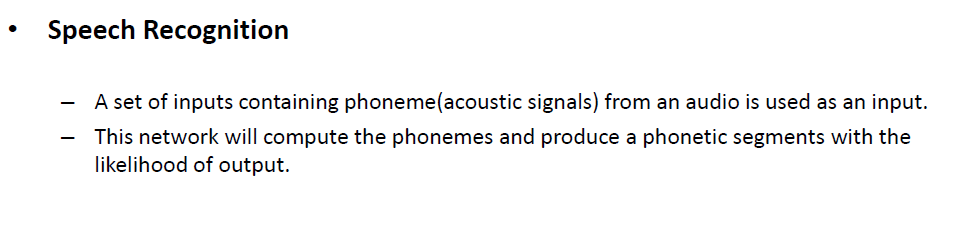

# Recurrent Neural Networks

Humans don’t start their thinking from scratch every second. As you read this essay, you understand each word based on your understanding of previous words. You don’t throw everything away and start thinking from scratch again. Your thoughts have persistence.

Traditional neural networks can’t do this, and it seems like a major shortcoming. For example, imagine you want to classify what kind of event is happening at every point in a movie. It’s unclear how a traditional neural network could use its reasoning about previous events in the film to inform later ones.

Recurrent neural networks address this issue. They are networks with loops in them, allowing information to persist.

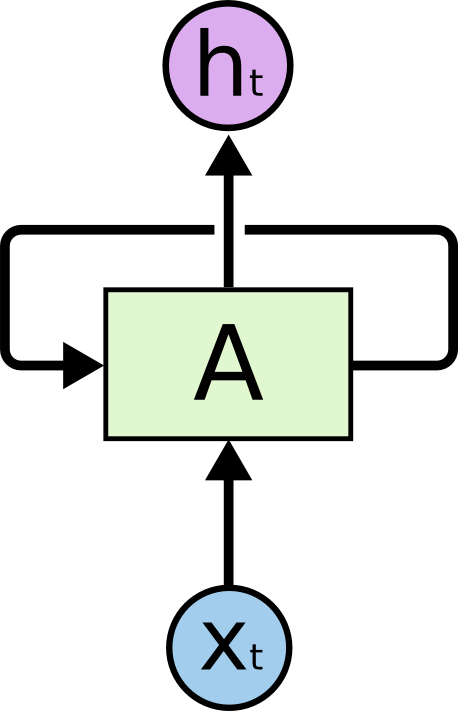

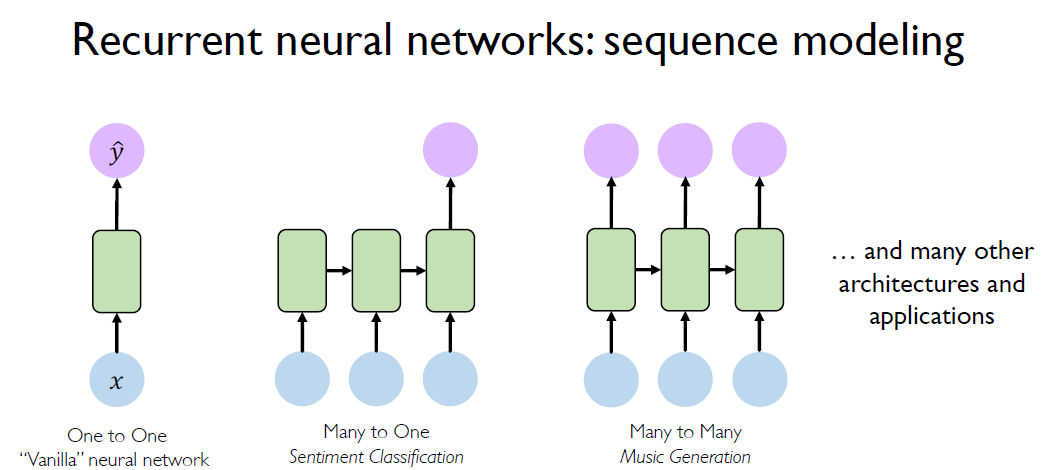

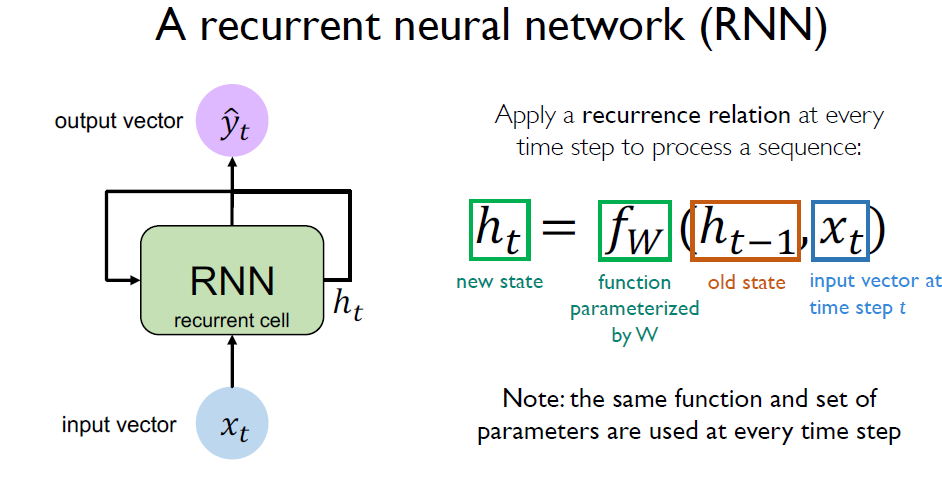

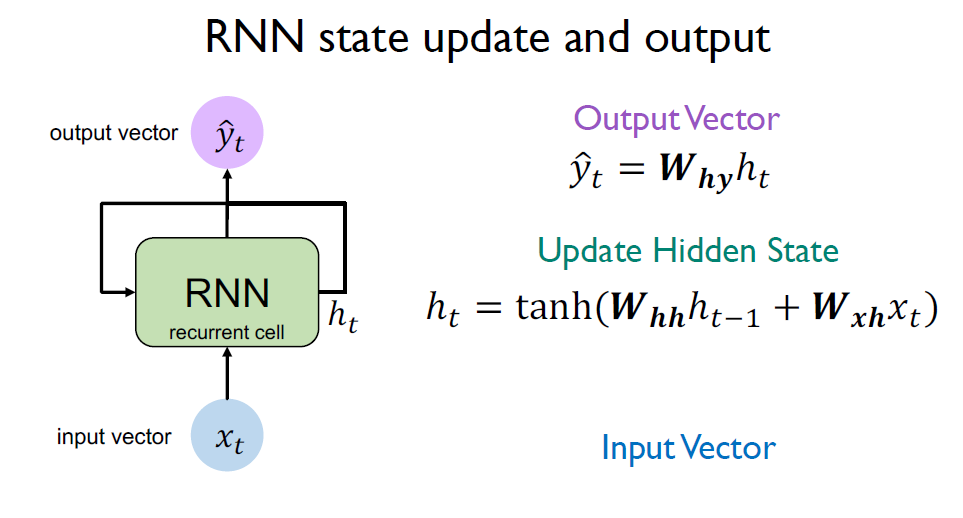

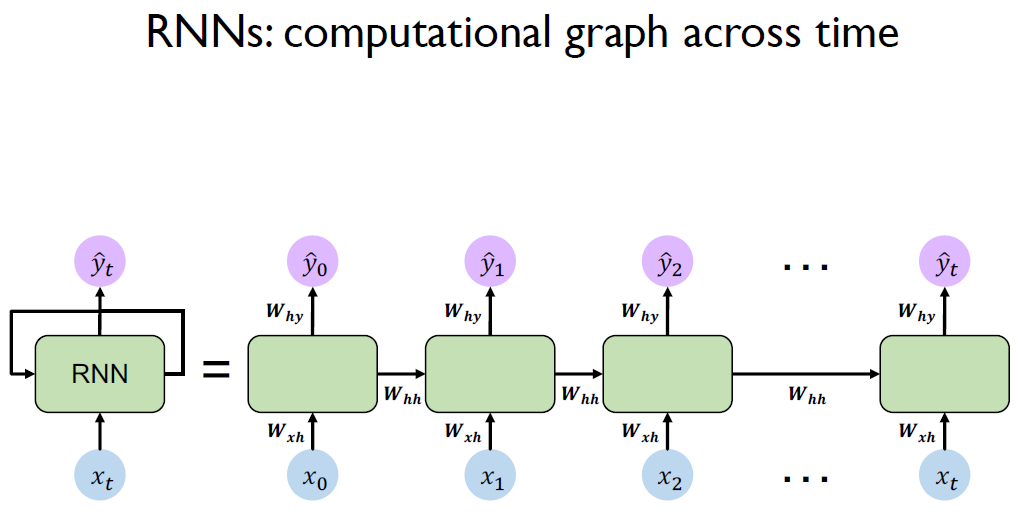

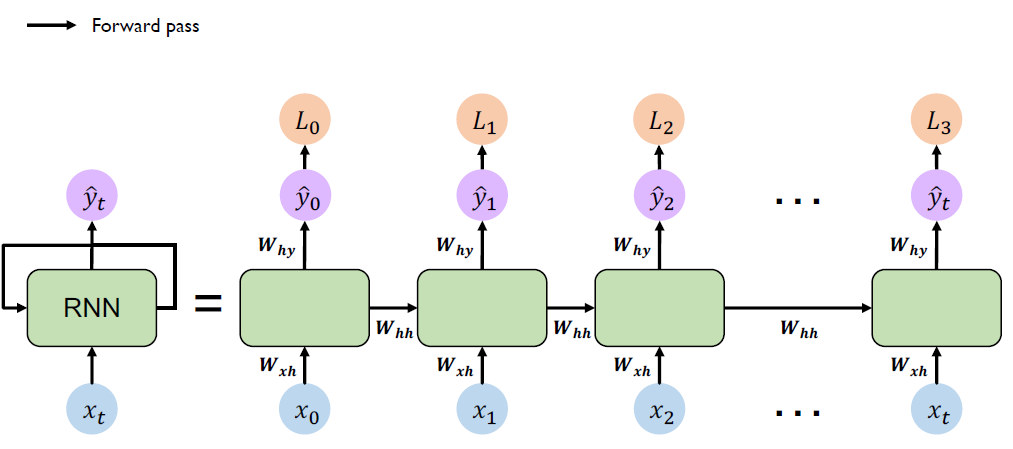

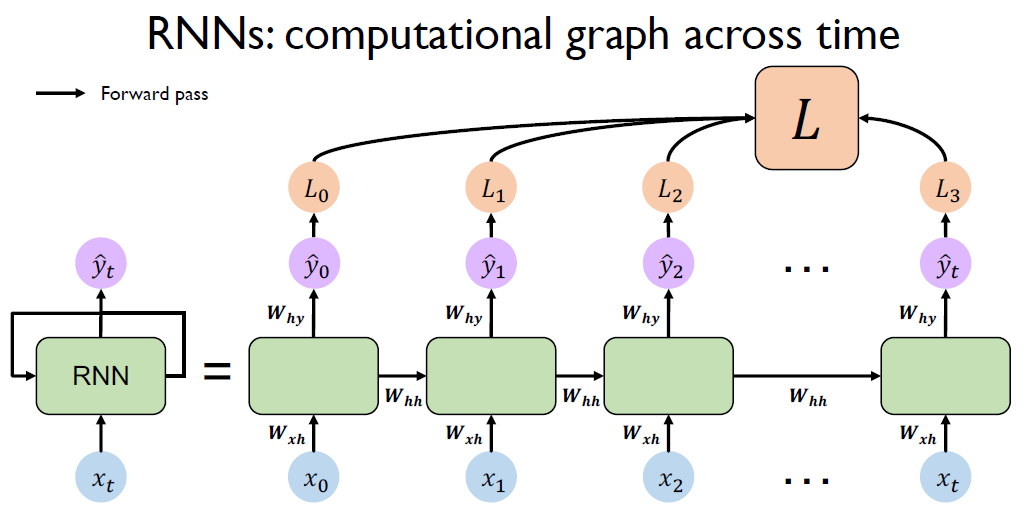

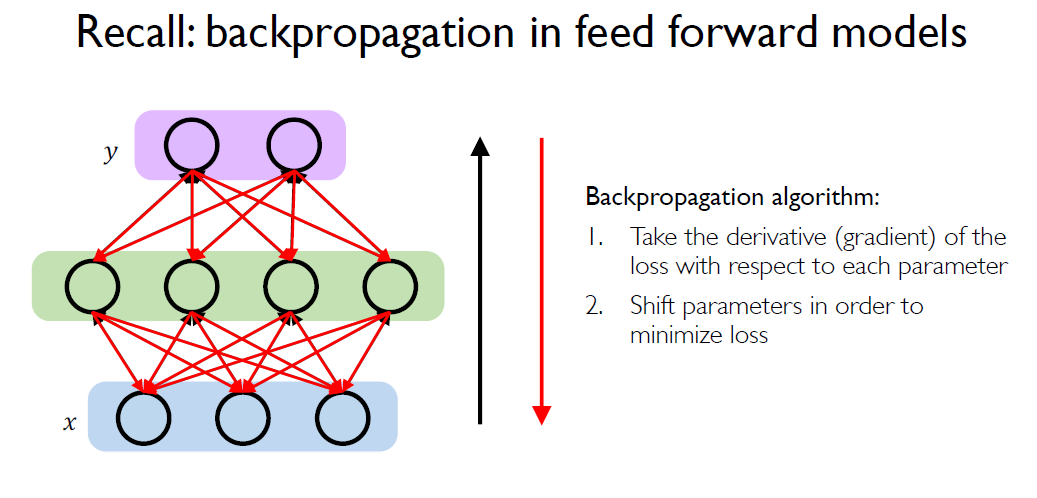

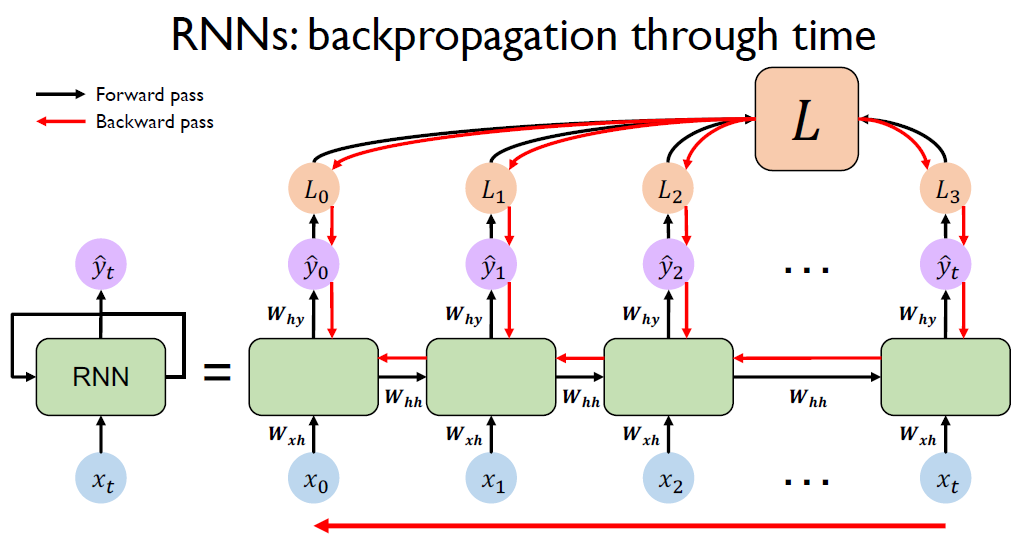

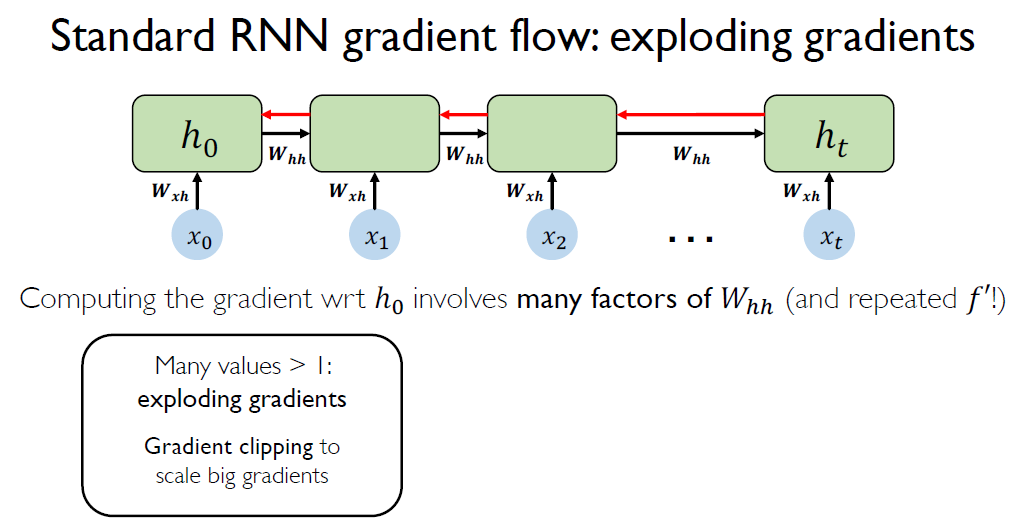

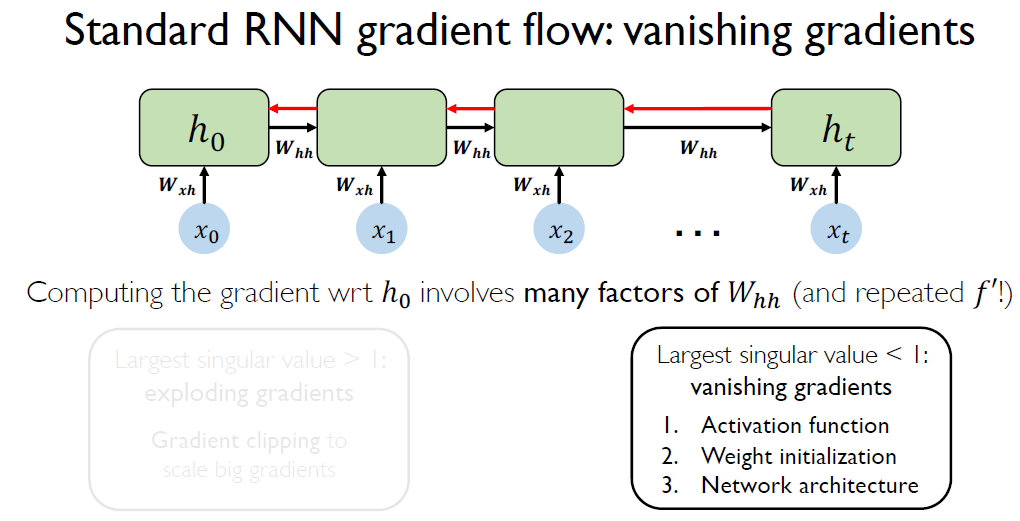

# Solution - Gated Cells
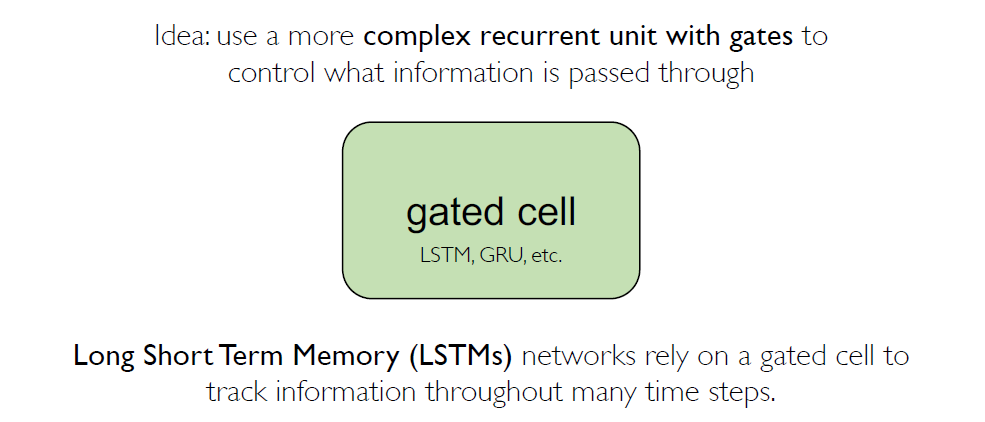

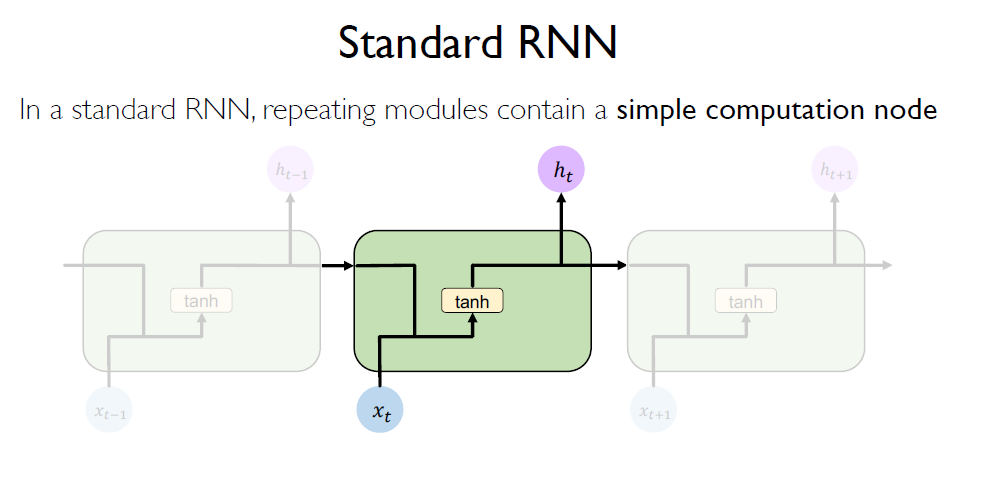

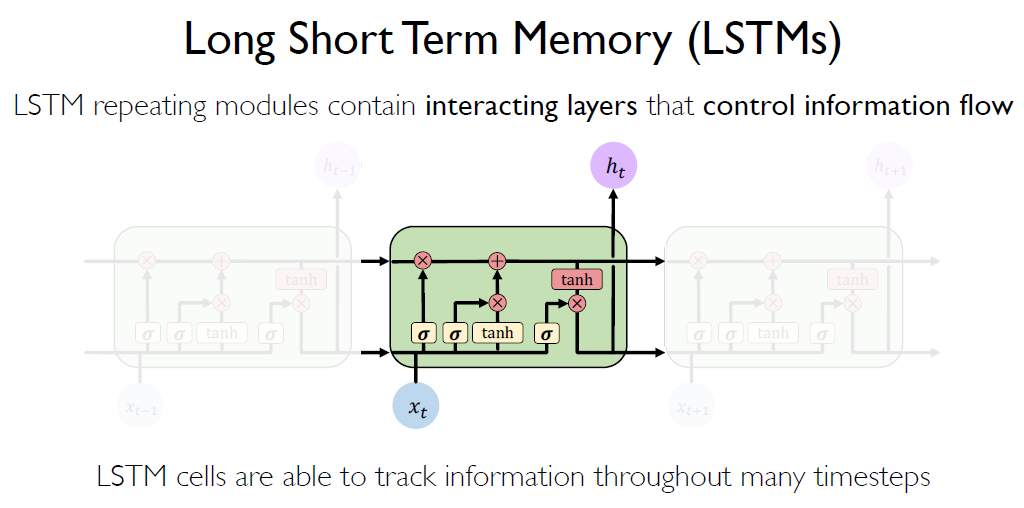

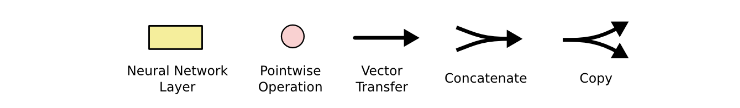

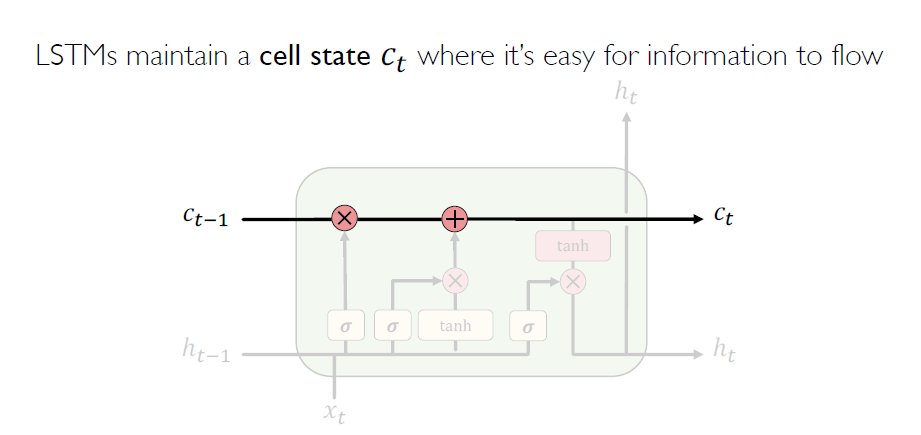

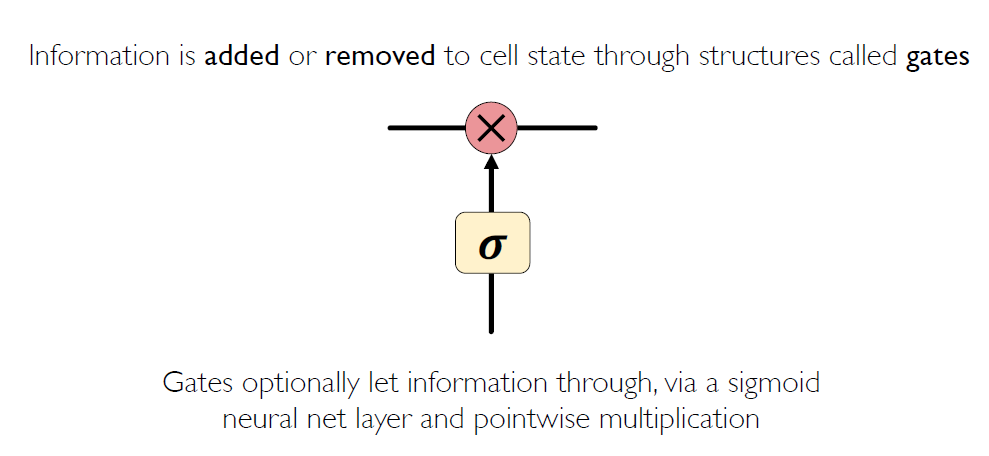

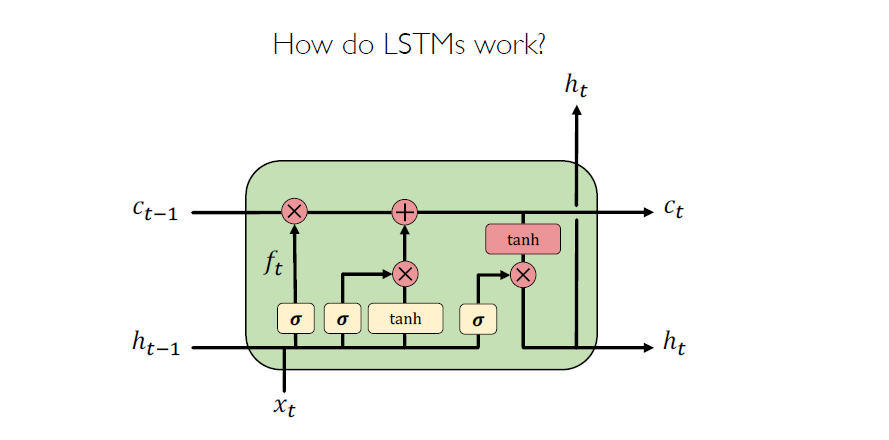

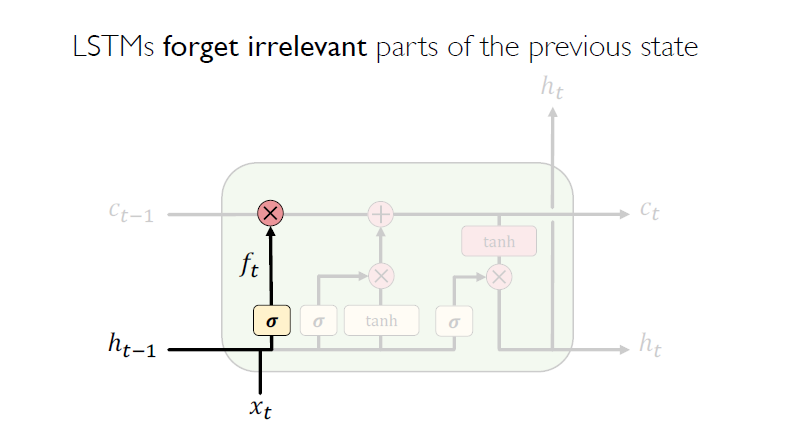

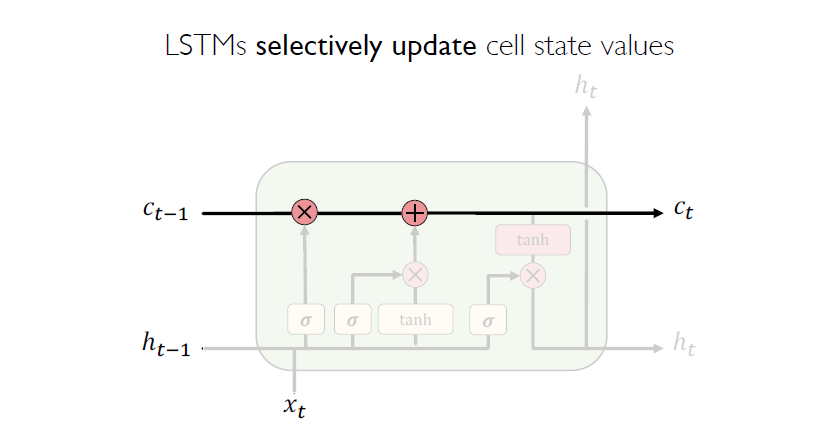

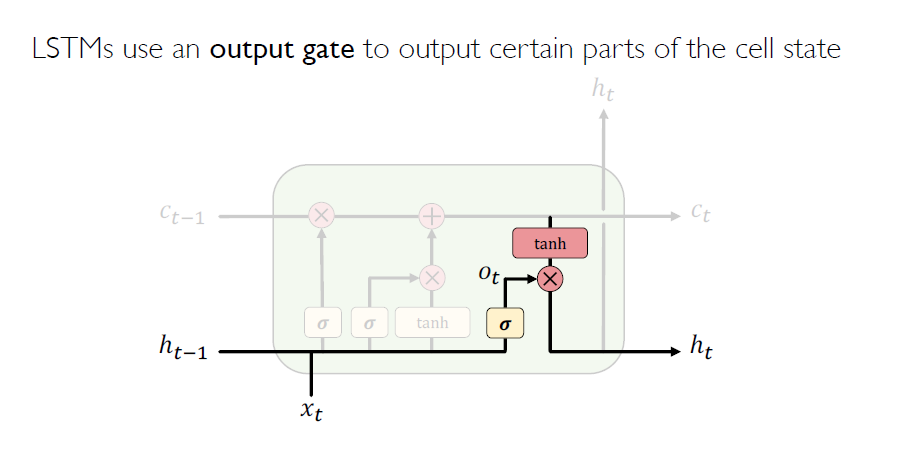

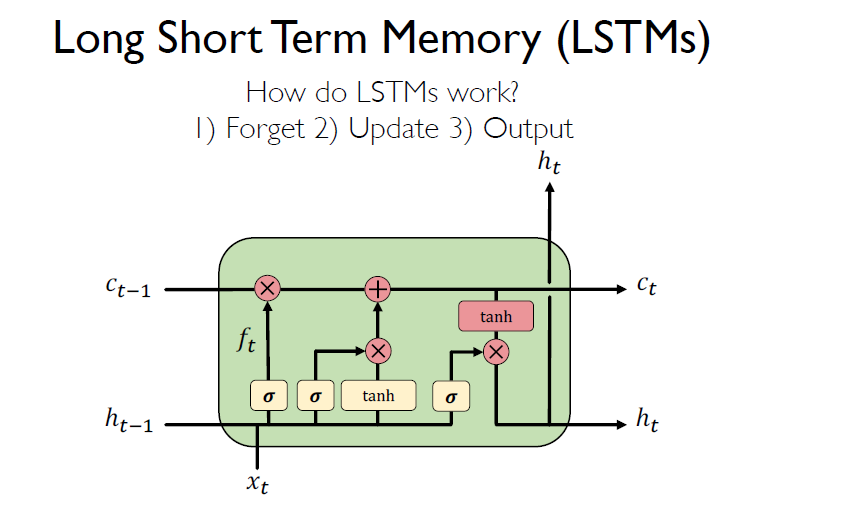

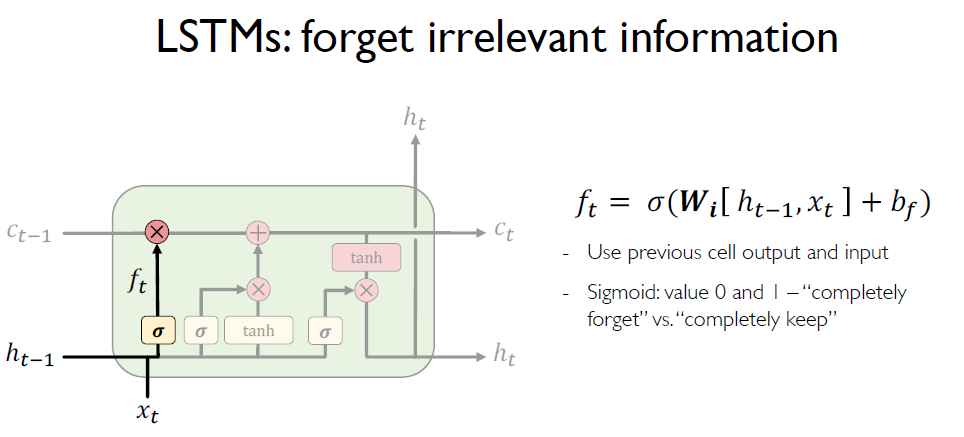

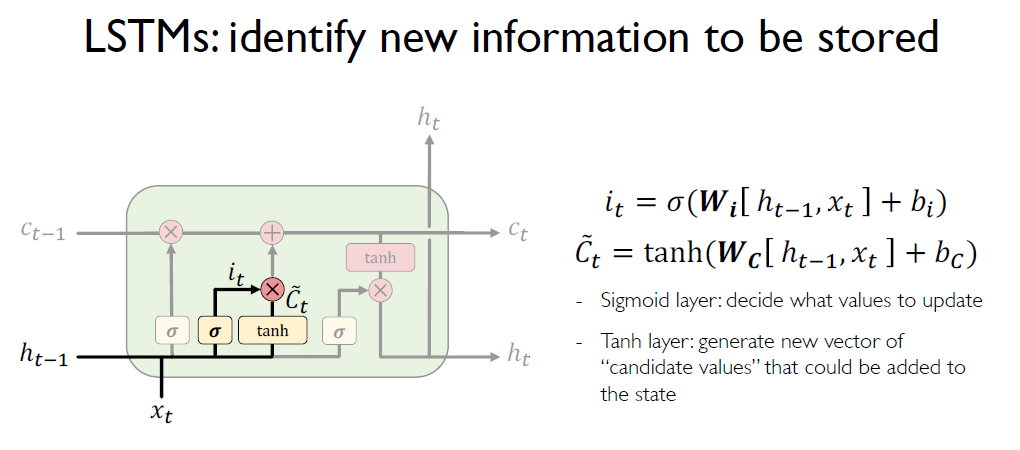

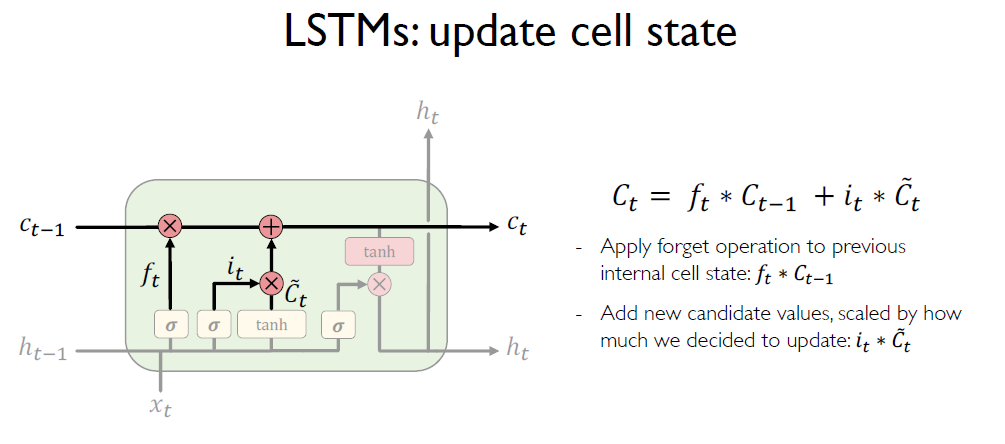

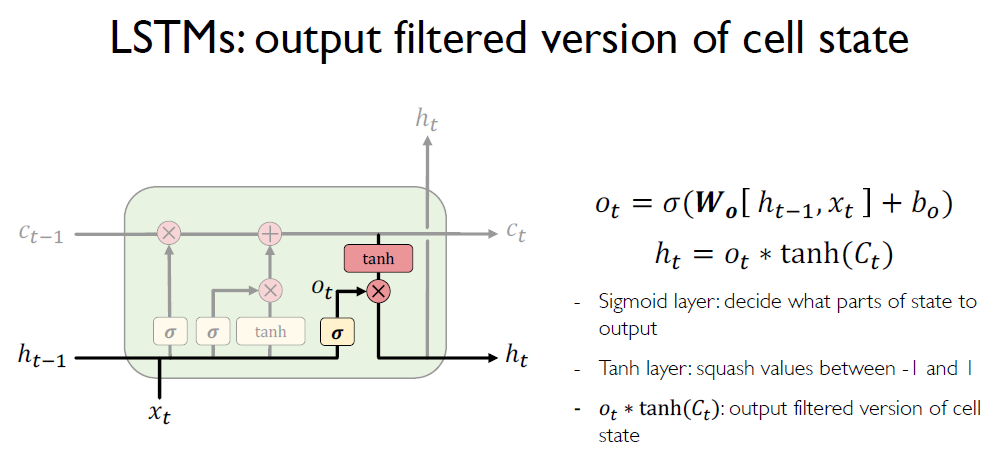

# Application - Stock Market Value Prediction

In [4]:
import pandas as pd

dataset=pd.read_csv('AAPL_data.csv')
dataset.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [5]:
dataset=dataset.values
open_value=dataset[:,1]
print(open_value[:5])

[67.7142 68.0714 68.5014 66.7442 66.3599]


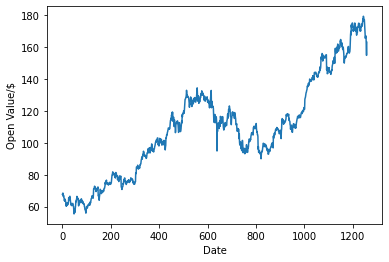

In [6]:
from matplotlib import pyplot as plt

plt.plot(open_value)
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [9]:
open_value=open_value.reshape(-1,1) #convering into a column vector

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_open_value=scaler.fit_transform(open_value)

print(open_value[:5].T)
print(scaled_open_value[:5].T)

[[67.7142 68.0714 68.5014 66.7442 66.3599]]
[[0.09915624 0.10203815 0.10550741 0.09133024 0.08822969]]


# Features and Labels

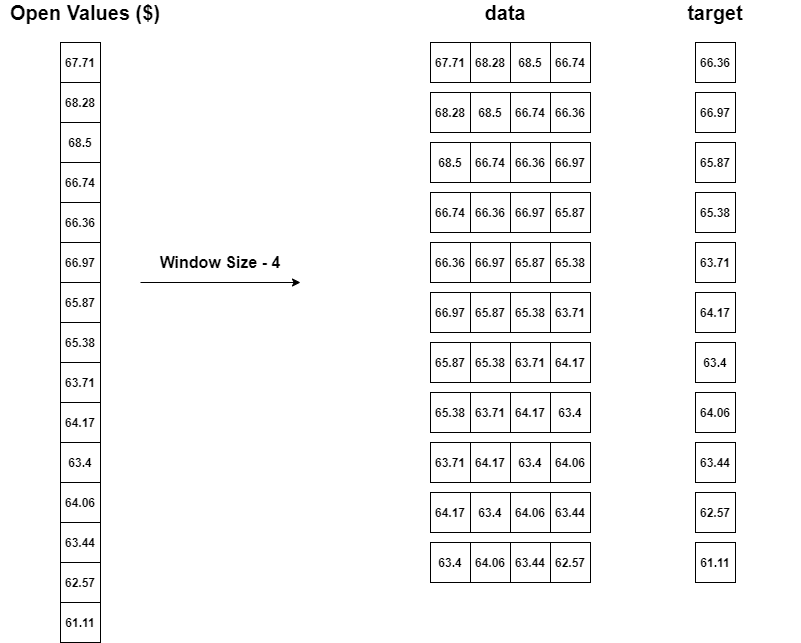

In [12]:
data=[]
target=[]

window_size=50

for i in range(0,open_value.shape[0]-window_size):
    data.append(scaled_open_value[i:i+window_size])
    target.append(scaled_open_value[i+window_size])

In [13]:
import numpy as np

data_np=np.array(data)
target_np=np.array(target)

print(data_np.shape)
print(target_np.shape)

(1209, 50, 1)
(1209, 1)


In [14]:
np.save('data',data)
np.save('target',target)

# Take Home Assignment - 1D CNN for time Series Data

[Github link for the Assignment](https://github.com/aieml/DLNN-Assignment-03)